# JillyAtlanta Sales Analysis
Dollars per PDF over time
***

In [1]:
import pandas as pd
import numpy as np
import glob
from matplotlib import pyplot as plt

In [2]:
fiels = glob.glob('./etsy/EtsySoldOrderItems/*.csv')
df1 = pd.DataFrame()
for fiel in fiels:
    dfi = pd.read_csv(fiel)
    df1 = pd.concat([df1, dfi])
# df1.columns

In [3]:
et_items = df1[['Sale Date',
           'Order ID', 
           'Item Name']].copy()
et_items.columns = ['date', 'order_id', 'item_name']
et_items['date'] = pd.to_datetime(et_items['date'])
et_items.sort_values(by='date', inplace=True)
# et_items.head()

In [4]:
def is_pdf(x):
    return 'pdf' in x.casefold()

et_items['is_pdf'] = et_items.item_name.apply(is_pdf)

In [5]:
# et_items.head()
# len(et_items)

In [6]:
et_items.drop_duplicates(subset=['order_id'], inplace=True)
#et_items.head(30)
# len(et_items)

In [7]:
fiels = glob.glob('./etsy/EtsySales/*.csv')
df2 = pd.DataFrame()
for fiel in fiels:
    dfi = pd.read_csv(fiel)
    df2 = pd.concat([df2, dfi])
# df2.columns

In [8]:
et_sales = df2[['Order Date',
                'Order ID', 
                'Net Amount', 
                'Refund Amount']].copy()
et_sales.columns = ['date', 'order_id', 'payment_amt', 'refund_amt']
et_sales['date'] = pd.to_datetime(et_sales['date'])
et_sales.sort_values(by='date', inplace=True)
et_sales.head()
len(et_sales)

12225

In [9]:
et_merged = pd.merge(et_sales, et_items, on='order_id', how='left')
et_merged.head(30)
len(et_merged)

12225

In [10]:
print(len(et_merged))
et_merged = et_merged[et_merged.is_pdf == True]
print(len(et_merged))
et_merged['net_amt'] = et_merged['payment_amt'] - et_merged['refund_amt']
#et_merged.head()

12225
11915


In [11]:
#listings = et_merged.item_name.drop_duplicates()
#len(listings)

In [12]:
listings = pd.read_csv('listings.csv')
listings_dict = dict(zip(listings.listing.values, listings.item.values))

In [13]:
et_merged['item'] = et_merged['item_name'].map(listings_dict)
et = et_merged[['date_x', 'item', 'net_amt']].copy()
et.columns = ['date', 'item', 'net']
et.head()

,date,item,net
11,2014-12-06,gathered_skirt,8.48
16,2015-02-07,criss_cross_cape,8.48
19,2015-02-19,criss_cross_cape,8.48
23,2015-03-02,criss_cross_cape,8.48
25,2015-03-06,lottie_bonnet,5.57


In [14]:
patterns_set = set()
patterns = list(et.item.values)
nets = list(et.net.values)

num_patterns = []
pattern_Count = 0
for pattern in patterns:
    if pattern not in patterns_set:
        patterns_set.add(pattern)
        pattern_Count += 1
    num_patterns.append(pattern_Count)

net_total = []
net_sum = 0
for net in nets:
    net_sum += net
    net_total.append(net_sum)

print(num_patterns[:10])
print(net_total[:10])

doll_per_patt = np.array(net_total) / np.array(num_patterns)

[1, 2, 2, 2, 3, 3, 3, 3, 3, 3]
[8.48, 16.96, 25.44, 33.92, 39.49, 45.06, 50.63, 56.2, 64.68, 73.16000000000001]


In [15]:
et['num_patterns'] = num_patterns
et['net_sum'] = net_total
et['dollars_per_pattern'] = doll_per_patt
et.tail()

,date,item,net,num_patterns,net_sum,dollars_per_pattern
12220,2022-03-09,angelica,8.48,44,100795.69,2290.811136
12221,2022-03-09,marlow,8.48,44,100804.17,2291.003864
12222,2022-03-09,melbourne,8.43,44,100812.60,2291.195455
12223,2022-03-09,laurel,17.17,44,100829.77,2291.585682
12224,2022-03-10,hillary,7.51,44,100837.28,2291.756364


Text(0.5, 1.0, 'Dollars per Pattern over Time')

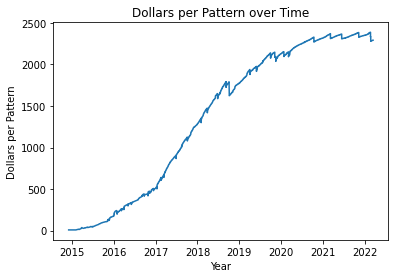

In [16]:
plt.plot(et.date, et.dollars_per_pattern)
plt.xlabel('Year')
plt.ylabel('Dollars per Pattern')
plt.title('Dollars per Pattern over Time')

In [17]:
df3 = pd.read_csv('./shopify/sales.csv')
# Get rid of dates that have no sales
df3 = df3.dropna(axis=0)
df3.head()

,day,product_title,orders,gross_sales,discounts,returns,net_sales,total_sales
0,2021-12-21,Lola Blouse,1,9.0,0.0,0.0,9.0,9.0
1,2021-12-21,Hastings Vest,1,9.0,0.0,0.0,9.0,9.0
2,2021-12-21,Agatha Top + Dress,1,9.0,0.0,0.0,9.0,9.0
3,2021-12-21,Cora Blouse,1,9.0,0.0,0.0,9.0,9.0
4,2021-12-21,Melbourne Romper,1,9.0,0.0,0.0,9.0,9.0


Make 'item' column for shopify df based on names from etsy df.

In [18]:
patterns = df3.product_title.unique()
sh_patt_dict = {}
for pattern in patterns:
    x = pattern.lower().split()
    pattp = x[0]
    for i in range(1, len(x)):
        if pattp in patterns_set:
            break
        else:
            pattp += ('_' + x[i])
    #print(pattp)
    sh_patt_dict[pattern] = pattp

In [19]:
#sh_patt_dict

In [20]:
df3['item'] = df3['product_title'].map(sh_patt_dict)
df3.reset_index(inplace=True)
df3.head()

,index,day,product_title,orders,gross_sales,discounts,returns,net_sales,total_sales,item
0,0,2021-12-21,Lola Blouse,1,9.0,0.0,0.0,9.0,9.0,lola
1,1,2021-12-21,Hastings Vest,1,9.0,0.0,0.0,9.0,9.0,hastings_vest
2,2,2021-12-21,Agatha Top + Dress,1,9.0,0.0,0.0,9.0,9.0,agatha
3,3,2021-12-21,Cora Blouse,1,9.0,0.0,0.0,9.0,9.0,cora
4,4,2021-12-21,Melbourne Romper,1,9.0,0.0,0.0,9.0,9.0,melbourne


In [21]:
sh = df3[['day', 'item', 'net_sales']].copy()
sh.columns = ['date', 'item', 'net']
sh['date'] = pd.to_datetime(sh['date'])

In [22]:
sh.head()

,date,item,net
0,2021-12-21,lola,9.0
1,2021-12-21,hastings_vest,9.0
2,2021-12-21,agatha,9.0
3,2021-12-21,cora,9.0
4,2021-12-21,melbourne,9.0


In [23]:
print(len(et))
print(len(sh))
et0 = et[['date', 'item', 'net']]
ja = pd.concat([et0, sh], ignore_index=True)
ja.sort_values(by=['date'], inplace=True)
ja.to_csv(r'x.csv')

11915
1202


In [24]:
patterns_set = set()
patterns = list(ja.item.values)
nets = list(ja.net.values)

num_patterns = []
pattern_Count = 0
for pattern in patterns:
    if pattern not in patterns_set:
        patterns_set.add(pattern)
        pattern_Count += 1
    num_patterns.append(pattern_Count)

net_total = []
net_sum = 0
for net in nets:
    net_sum += net
    net_total.append(net_sum)

print(num_patterns[:10])
print(net_total[:10])

doll_per_patt = np.array(net_total) / np.array(num_patterns)

[1, 2, 2, 2, 3, 3, 3, 3, 3, 3]
[8.48, 16.96, 25.44, 33.92, 39.49, 45.06, 50.63, 56.2, 64.68, 73.16000000000001]


In [25]:
ja['num_patterns'] = num_patterns
ja['net_sum'] = net_total
ja['dollars_per_pattern'] = doll_per_patt
ja.tail()

,date,item,net,num_patterns,net_sum,dollars_per_pattern
11914,2022-03-10,hillary,7.51,46,112129.4,2437.595652
13072,2022-03-10,duchess,9.00,46,112138.4,2437.791304
13073,2022-03-10,camden,9.00,46,112147.4,2437.986957
12049,2022-03-11,riviera_cardigan_-_knit,9.00,46,112156.4,2438.182609
12048,2022-03-11,birdie,10.00,46,112166.4,2438.400000


Text(0.5, 1.0, 'Dollars per Pattern over Time')

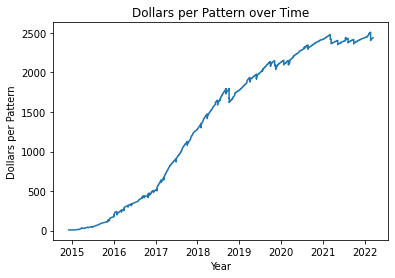

In [26]:
plt.plot(ja.date, ja.dollars_per_pattern)
plt.xlabel('Year')
plt.ylabel('Dollars per Pattern')
plt.title('Dollars per Pattern over Time')